In [76]:
import pandas as pd

file_path = 'Company Insolvencies by Industry.xlsx'

In [77]:
!pip install openpyxl

import pandas as pd

#To extract the Excel file
file_path = 'Company Insolvencies by Industry.xlsx'

# To Load the Excel file
excel_data = pd.ExcelFile(file_path)

# To Display sheet names
sheet_names = excel_data.sheet_names
print(sheet_names)


['Cover_Page', 'Contents', 'Methodology_and_Quality', 'Notes', 'Glossary', 'Table_1a', 'Table_1b', 'Company Insolvencies by Industr', 'Table_1d', 'Table_1e', 'Table_2', 'Table_3', 'Table_4a', 'Table_4b', 'Table_5', 'Table_6', 'Table_7']


In [78]:
import pandas as pd
import numpy as np

sheet_name = 'Company Insolvencies by Industr'

# Load data from the specific sheet
df = pd.read_excel('Company Insolvencies by Industry.xlsx', sheet_name=sheet_name)

# Display the first few rows of the loaded data
print(df.head())


         Table 1c: Company insolvencies by industry  Unnamed: 1 Unnamed: 2  \
0                                   Back to contents        NaN        NaN   
1  This worksheet contains one table. Some cells ...        NaN        NaN   
2  Numbers by industry are not available for the ...        NaN        NaN   
3  Sources: Insolvency Service (compulsory liquid...        NaN        NaN   
4  Further Standard Industrial Classification lev...        NaN        NaN   

  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0        NaN         NaN         NaN         NaN         NaN         NaN   
1        NaN         NaN         NaN         NaN         NaN         NaN   
2        NaN         NaN         NaN         NaN         NaN         NaN   
3        NaN         NaN         NaN         NaN         NaN         NaN   
4        NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 9  ...  Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  \


In [79]:
import pandas as pd

file_path = 'Company Insolvencies by Industry.xlsx'
sheet_name = 'Company Insolvencies by Industr'

# To Load data from the specific sheet
df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=6)

# To Display the first few rows of the loaded data to see the table structure
print(df.head())

# To Clean data: Dropping fully unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# To Display the cleaned data
print(df.head())

def clean_data(df):
    # TO Handle missing values
    df = df.dropna(how='all')  # To Drop rows where all elements are NaN
    df = df.dropna(axis=1, how='all')  # To Drop columns where all elements are NaN
    
    # To Standardize date format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # To Remove any remaining unnamed columns
    df.columns = df.columns.str.strip()  # To Strip any leading/trailing whitespace from column names

    # Assume numerical columns need outlier removal
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Clean the loaded data
cleaned_data = clean_data(df)

# Display the cleaned data
print(cleaned_data.head())


  Record-level data - Company Insolvency Statistics May 2024 Unnamed: 1  \
0                                            Section           Division   
1                                              Total                  -   
2                                                  A                NaN   
3                                                  A                 01   
4                                                  A                 01   

  Unnamed: 2                                         Unnamed: 3  Unnamed: 4  \
0      Group                                        Description      2014.0   
1          -                                                  -     16253.0   
2        NaN                  AGRICULTURE, FORESTRY AND FISHING        53.0   
3        NaN  Crop and animal production, hunting and relate...        40.0   
4         11                     Growing of non-perennial crops         8.0   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0   

In [80]:
import pandas as pd

# Define the file path and sheet name
file_path = 'Company Insolvencies by Industry.xlsx'
sheet_name = 'Company Insolvencies by Industr'

# Load data from the specific sheet, skipping initial metadata rows
df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=6)

# Display the first few rows of the loaded data to see the table structure
print("Initial data:")
print(df.head())

# Display the columns to understand the structure
print("Columns in the dataframe:")
print(df.columns)

# Attempt to drop fully unnamed columns 
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display the columns after dropping unnamed columns
print("Columns after dropping unnamed columns:")
print(df.columns)

# Check the number of columns and rename them appropriately
if len(df.columns) >= 4:
    new_columns = ['Section', 'Division', 'Group', 'Description'] + [str(col) for col in df.columns[4:]]
    df.columns = new_columns
else:
    print("Unexpected number of columns. Inspect the dataframe structure.")
    print(df.columns)

# Display the columns to ensure they have been renamed correctly
print("Columns after renaming:")
print(df.columns)

# Drop any rows where 'Section' is NaN as they are likely metadata or empty
if 'Section' in df.columns:
    df = df.dropna(subset=['Section'])
else:
    print("'Section' column not found. Please check the dataframe structure.")

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Convert numerical columns to the correct type
for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned data
print("Cleaned data:")
print(df.head())


def clean_data(df):
    # Handling missing values
    df = df.dropna(how='all')  # Drop rows where all elements are NaN
    df = df.dropna(axis=1, how='all')  # Drop columns where all elements are NaN
    
    # Standardizing date formats
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # To Remove outliers from numerical columns using IQR
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Clean the loaded data
cleaned_data = clean_data(df)

# Display the cleaned data
print(cleaned_data.head())


Initial data:
  Record-level data - Company Insolvency Statistics May 2024 Unnamed: 1  \
0                                            Section           Division   
1                                              Total                  -   
2                                                  A                NaN   
3                                                  A                 01   
4                                                  A                 01   

  Unnamed: 2                                         Unnamed: 3  Unnamed: 4  \
0      Group                                        Description      2014.0   
1          -                                                  -     16253.0   
2        NaN                  AGRICULTURE, FORESTRY AND FISHING        53.0   
3        NaN  Crop and animal production, hunting and relate...        40.0   
4         11                     Growing of non-perennial crops         8.0   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 

In [81]:
import pandas as pd

# Define the file path and sheet name
file_path = 'Company Insolvencies by Industry.xlsx'
sheet_name = 'Company Insolvencies by Industr'

# Load data from the specific sheet, skipping initial metadata rows
df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=6, header=1)

# Display the first few rows of the loaded data to see the table structure
print("Initial data:")
print(df.head())

# Display the columns to understand the structure
print("Columns in the dataframe:")
print(df.columns)

# Renaming columns 
if len(df.columns) >= 4:
    new_columns = ['Section', 'Division', 'Group', 'Description'] + [str(col) for col in df.columns[4:]]
    df.columns = new_columns
else:
    print("Unexpected number of columns. Inspect the dataframe structure.")
    print(df.columns)

# Display the columns after renaming to ensure they have been renamed correctly
print("Columns after renaming:")
print(df.columns)

# Drop any rows where 'Section' is NaN as they are likely metadata or empty
if 'Section' in df.columns:
    df = df.dropna(subset=['Section'])
else:
    print("'Section' column not found. Please check the dataframe structure.")

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Convert numerical columns to the correct type
for col in df.columns[4:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned data
print("Cleaned data:")
print(df.head())

# Further cleaning 
def clean_data(df):
    # Handling missing values
    df = df.dropna(how='all')  # Drop rows where all elements are NaN
    df = df.dropna(axis=1, how='all')  # Drop columns where all elements are NaN
    
    # Standardizing date formats
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Remove outliers from numerical columns using IQR
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Clean the loaded data
cleaned_data = clean_data(df)

# Display the cleaned data
print("Further cleaned data:")
print(cleaned_data.head())


Initial data:
  Section Division Group                                        Description  \
0   Total        -     -                                                  -   
1       A      NaN   NaN                  AGRICULTURE, FORESTRY AND FISHING   
2       A       01   NaN  Crop and animal production, hunting and relate...   
3       A       01    11                     Growing of non-perennial crops   
4       A       01    12                         Growing of perennial crops   

      2014     2015     2016     2017     2018     2019  ...  Sep 2023  \
0  16253.0  14551.0  14669.0  14570.0  16051.0  17171.0  ...    1965.0   
1     53.0     41.0     46.0     51.0     48.0     53.0  ...       5.0   
2     40.0     31.0     28.0     37.0     37.0     38.0  ...       4.0   
3      8.0      6.0      6.0      6.0      9.0      3.0  ...       1.0   
4      4.0      2.0      0.0      1.0      2.0      0.0  ...       0.0   

   Oct 2023  Nov 2023  Dec 2023  Jan 2024  Feb 2024  Mar 2024  Apr

In [82]:
import pandas as pd

# Load the CSV files
gdp_df = pd.read_csv('Gross Domestic Product Rate.csv')
inflation_df = pd.read_csv('Inflation.csv')

# Inspect the columns of the data
print("GDP Data Columns:")
print(gdp_df.columns)

print("\nInflation Data Columns:")
print(inflation_df.columns)


GDP Data Columns:
Index(['Title', 'Gross Domestic Product: Quarter on Quarter growth: CVM SA %'], dtype='object')

Inflation Data Columns:
Index(['Title', 'CPIH ANNUAL RATE 00: ALL ITEMS 2015=100'], dtype='object')


In [83]:
# Function to clean the GDP data
def clean_gdp_data(df):
    # Define the new columns names based on the actual number of columns in the DataFrame
    expected_cols = ['Section', 'Division', 'Group', 'Description'] + [str(year) for year in range(2014, 2025)] + \
                    ['Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021',
                     'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
                     'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023',
                     'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023',
                     'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Notes']
    
    # Adjust expected columns based on the actual number of columns in the DataFrame
    if len(df.columns) != len(expected_cols):
        print(f"Expected {len(expected_cols)} columns, but found {len(df.columns)}. Adjusting column names dynamically.")
        expected_cols = ['Section', 'Division', 'Group', 'Description'] + [str(year) for year in range(2014, 2025)] + \
                        [f'{month} {year}' for year in range(2021, 2025) for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']] + ['Notes']
        expected_cols = expected_cols[:len(df.columns)]

    # Rename the columns
    df.columns = expected_cols

    # Remove rows where the 'Section' column is NaN or empty
    df = df.dropna(subset=['Section'])

    # Reset the index
    df = df.reset_index(drop=True)

    return df

# Function to clean the Inflation data
def clean_inflation_data(df):
    # Modify this function based on the actual content of the inflation data
    if len(df.columns) == 2:
        df.columns = ['Date', 'Inflation Rate']  #renaming columns
    df = df.dropna(subset=[df.columns[0]])  # Remove rows where the first column is NaN or empty
    df = df.reset_index(drop=True)  # Reset the index
    return df

# Clean the data
clean_gdp_df = clean_gdp_data(gdp_df)
clean_inflation_df = clean_inflation_data(inflation_df)

# Inspect the cleaned data
print("\nCleaned GDP Data:")
print(clean_gdp_df.head())
print("\nCleaned Inflation Data:")
print(clean_inflation_df.head())

# Save the cleaned data to new CSV files
clean_gdp_df.to_csv('Cleaned_GDP.csv', index=False)
clean_inflation_df.to_csv('Cleaned_Inflation.csv', index=False)


Expected 57 columns, but found 2. Adjusting column names dynamically.

Cleaned GDP Data:
             Section    Division
0               CDID        IHYQ
1  Source dataset ID         QNA
2            PreUnit         NaN
3               Unit           %
4       Release date  28-06-2024

Cleaned Inflation Data:
                Date Inflation Rate
0               CDID           L55O
1  Source dataset ID           MM23
2            PreUnit            NaN
3               Unit              %
4       Release date     19-06-2024


In [84]:
import pandas as pd

# Load the CSV file, skipping the metadata rows
file_path = 'Unemployment Rate.csv'
df_cleaned = pd.read_csv(file_path, skiprows=8)

# Rename the columns 
df_cleaned.columns = ['Year', 'Unemployment Rate (%)']

# Display the first few rows of the cleaned dataframe
print(df_cleaned.head())

# Save the cleaned dataframe to a new CSV file
cleaned_file_path = 'Cleaned_Unemployment_Rate.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)


   Year  Unemployment Rate (%)
0  1972                    4.3
1  1973                    3.7
2  1974                    3.7
3  1975                    4.5
4  1976                    5.4


In [85]:
# Load the cleaned data
gdp_df = pd.read_csv('Cleaned_GDP.csv')
inflation_df = pd.read_csv('Cleaned_Inflation.csv')
unemployment_df = pd.read_csv('Cleaned_Unemployment_Rate.csv')

In [86]:
# 1. Descriptive Statistics
print("Descriptive Statistics for GDP Data:")
print(gdp_df.describe())
print("\nDescriptive Statistics for Inflation Data:")
print(inflation_df.describe())
print("\nDescriptive Statistics for Unemployment Data:")
print(unemployment_df.describe())


Descriptive Statistics for GDP Data:
       Section Division
count      283      281
unique     283       57
top       CDID      0.7
freq         1       27

Descriptive Statistics for Inflation Data:
        Date Inflation Rate
count    608            606
unique   608             86
top     CDID            2.4
freq       1             37

Descriptive Statistics for Unemployment Data:
       Unemployment Rate (%)
count             903.000000
mean                6.703987
std                 2.373123
min                 3.400000
25%                 4.900000
50%                 5.700000
75%                 8.300000
max                11.900000


In [87]:
# 2. Checking for Missing Values
print("\nMissing values in GDP Data:")
print(gdp_df.isnull().sum())

print("\nMissing values in Inflation Data:")
print(inflation_df.isnull().sum())

print("\nMissing values in Unemployment Data:")
print(unemployment_df.isnull().sum())


Missing values in GDP Data:
Section     0
Division    2
dtype: int64

Missing values in Inflation Data:
Date              0
Inflation Rate    2
dtype: int64

Missing values in Unemployment Data:
Year                     0
Unemployment Rate (%)    0
dtype: int64


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Load the cleaned data
cleaned_data = pd.read_csv('Cleaned_data.csv')


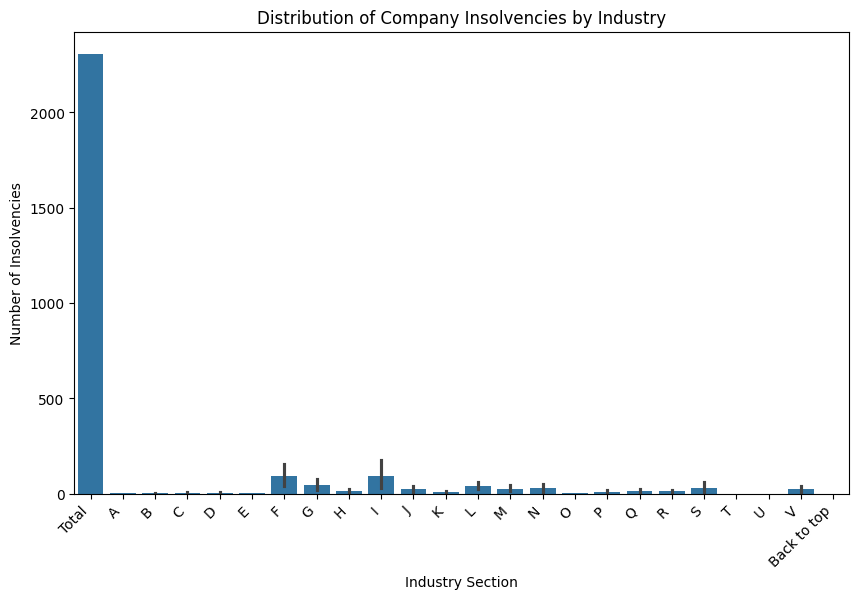

In [90]:
# Plot the distribution of company insolvencies by industry
plt.figure(figsize=(10, 6))
sns.barplot(x='Section', y=cleaned_data.columns[-1], data=cleaned_data)
plt.title('Distribution of Company Insolvencies by Industry')
plt.xlabel('Industry Section')
plt.ylabel('Number of Insolvencies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [91]:
print(cleaned_data.columns)


Index(['Section', 'Division', 'Group', 'Description', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', 'Jan 2021',
       'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021',
       'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022',
       'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022', 'Jul 2022',
       'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023',
       'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023',
       'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023', 'Jan 2024',
       'Feb 2024', 'Mar 2024', 'Apr 2024'],
      dtype='object')


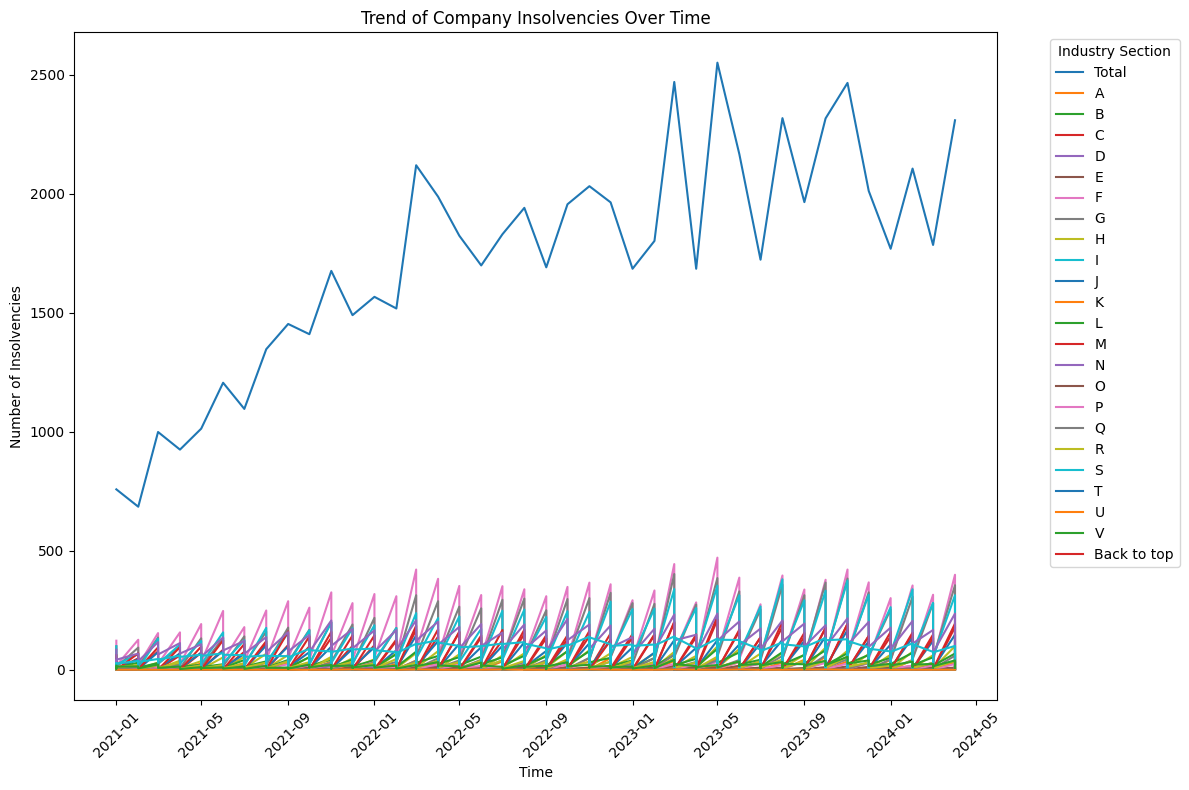

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Melt the data to reshape it from wide to long format
melted_data = cleaned_data.melt(
    id_vars=['Section', 'Division', 'Group', 'Description'],  # Columns to keep
    var_name='Date',       # Name for the date column
    value_name='Insolvencies'  # Name for the insolvencies column
)

# Convert the 'Date' column to datetime
melted_data['Date'] = pd.to_datetime(melted_data['Date'], errors='coerce', format='%b %Y')

# Drop any rows with NaT in the 'Date' column
melted_data = melted_data.dropna(subset=['Date'])

# Plotting the trend of company insolvencies over time for each industry
plt.figure(figsize=(12, 8))

for industry in melted_data['Section'].unique():
    industry_data = melted_data[melted_data['Section'] == industry]
    plt.plot(industry_data['Date'], industry_data['Insolvencies'], label=industry)

plt.title('Trend of Company Insolvencies Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Insolvencies')
plt.legend(title='Industry Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Total Insolvencies by Industry:
Section
Total          69318.0
F              37500.0
G              30429.0
I              27948.0
N              20601.0
M              17496.0
C              15936.0
J              12306.0
S              11121.0
H               7491.0
L               6366.0
Q               4296.0
R               4107.0
K               3813.0
P               2553.0
V               1812.0
E               1107.0
D                765.0
A                702.0
B                366.0
O                252.0
T                 57.0
U                 24.0
Back to top        0.0
Name: Insolvencies, dtype: float64


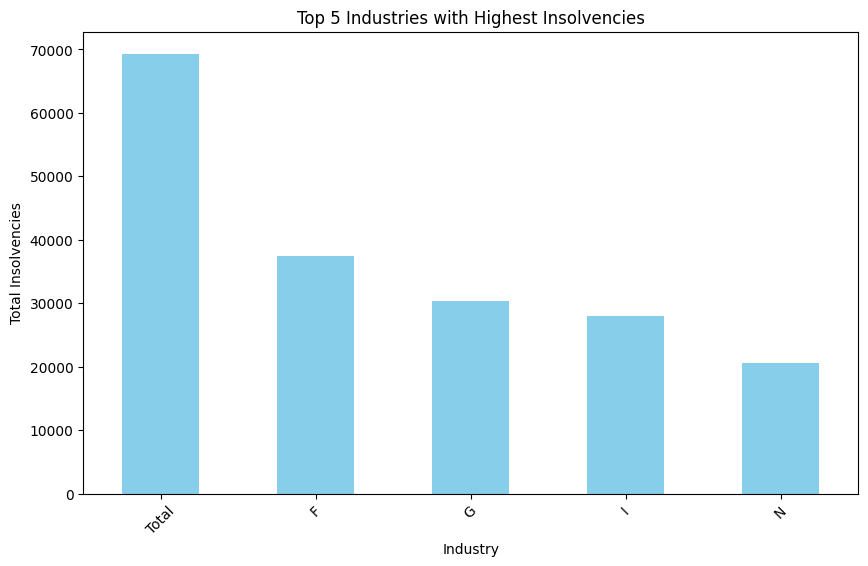

In [93]:
# Total insolvencies by industry
total_insolvencies_by_industry = melted_data.groupby('Section')['Insolvencies'].sum().sort_values(ascending=False)
print("\nTotal Insolvencies by Industry:")
print(total_insolvencies_by_industry)

# Plotting the top 5 industries with the highest insolvencies
top_5_industries = total_insolvencies_by_industry.head(5)

plt.figure(figsize=(10, 6))
top_5_industries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Industries with Highest Insolvencies')
plt.xlabel('Industry')
plt.ylabel('Total Insolvencies')
plt.xticks(rotation=45)
plt.show()


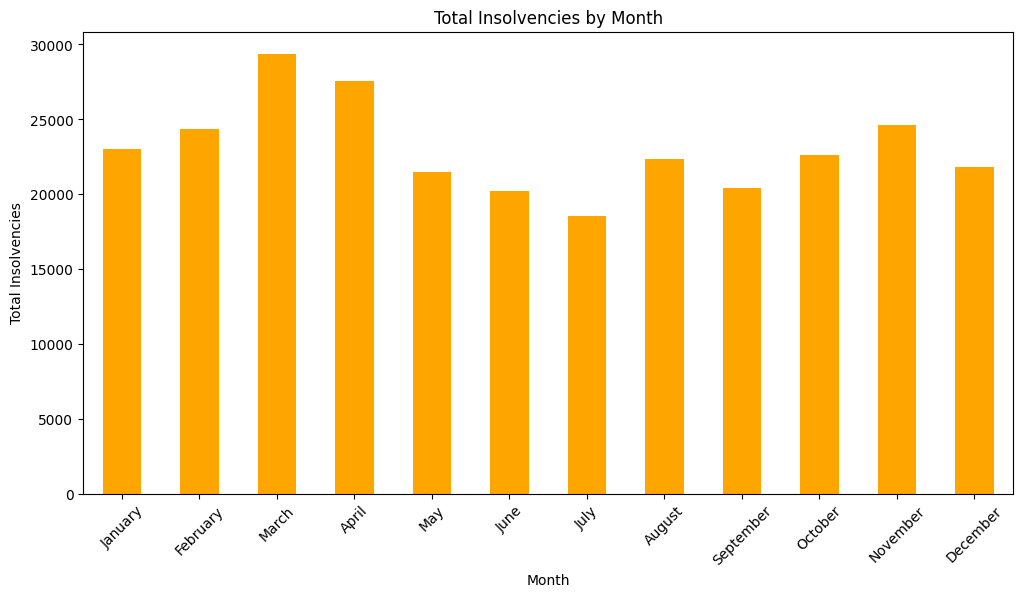

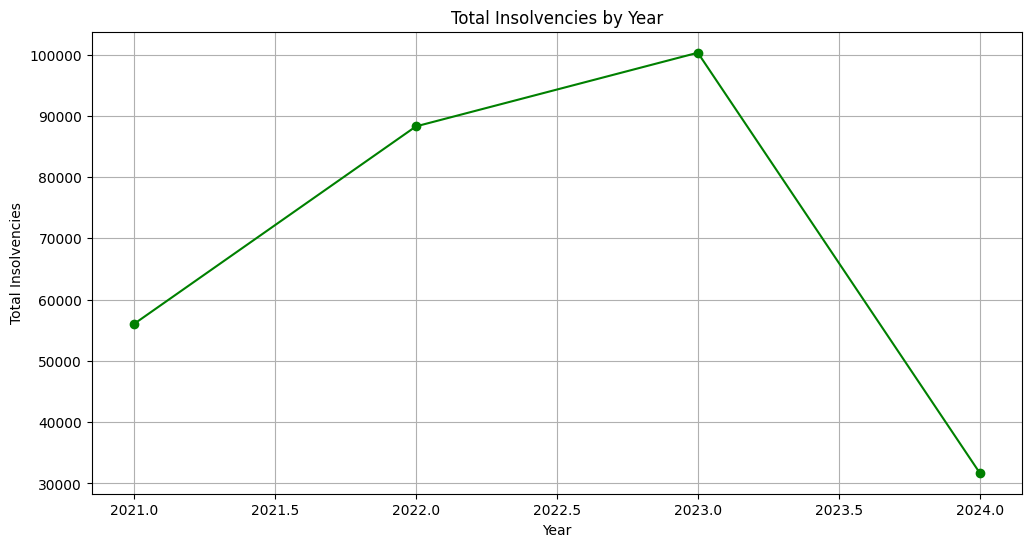

In [94]:
# Extract year and month from the 'Date' column
melted_data['Year'] = melted_data['Date'].dt.year
melted_data['Month'] = melted_data['Date'].dt.month_name()

# Monthly insolvency trends
monthly_trends = melted_data.groupby('Month')['Insolvencies'].sum().reindex(
    ["January", "February", "March", "April", "May", "June", "July", 
     "August", "September", "October", "November", "December"])

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='orange')
plt.title('Total Insolvencies by Month')
plt.xlabel('Month')
plt.ylabel('Total Insolvencies')
plt.xticks(rotation=45)
plt.show()

# Yearly insolvency trends
yearly_trends = melted_data.groupby('Year')['Insolvencies'].sum()

plt.figure(figsize=(12, 6))
yearly_trends.plot(kind='line', marker='o', color='green')
plt.title('Total Insolvencies by Year')
plt.xlabel('Year')
plt.ylabel('Total Insolvencies')
plt.grid(True)
plt.show()


/Users/unnatinitinchangole/anaconda3/envs/envs456/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


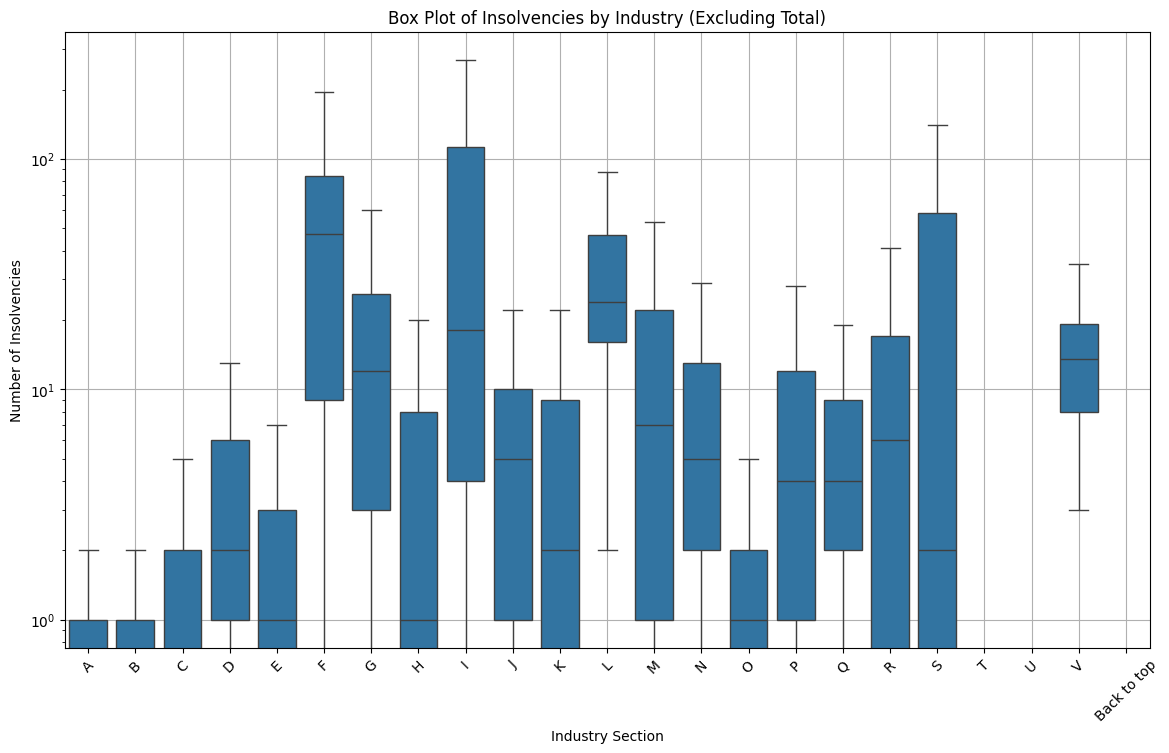

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'Total' category
filtered_data = melted_data[melted_data['Section'] != 'Total']

# Plot the box plot with adjusted settings
plt.figure(figsize=(14, 8))
sns.boxplot(x='Section', y='Insolvencies', data=filtered_data, showfliers=False)
plt.yscale('log')  # Apply logarithmic scale if the data range is large
plt.title('Box Plot of Insolvencies by Industry (Excluding Total)')
plt.xlabel('Industry Section')
plt.ylabel('Number of Insolvencies')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


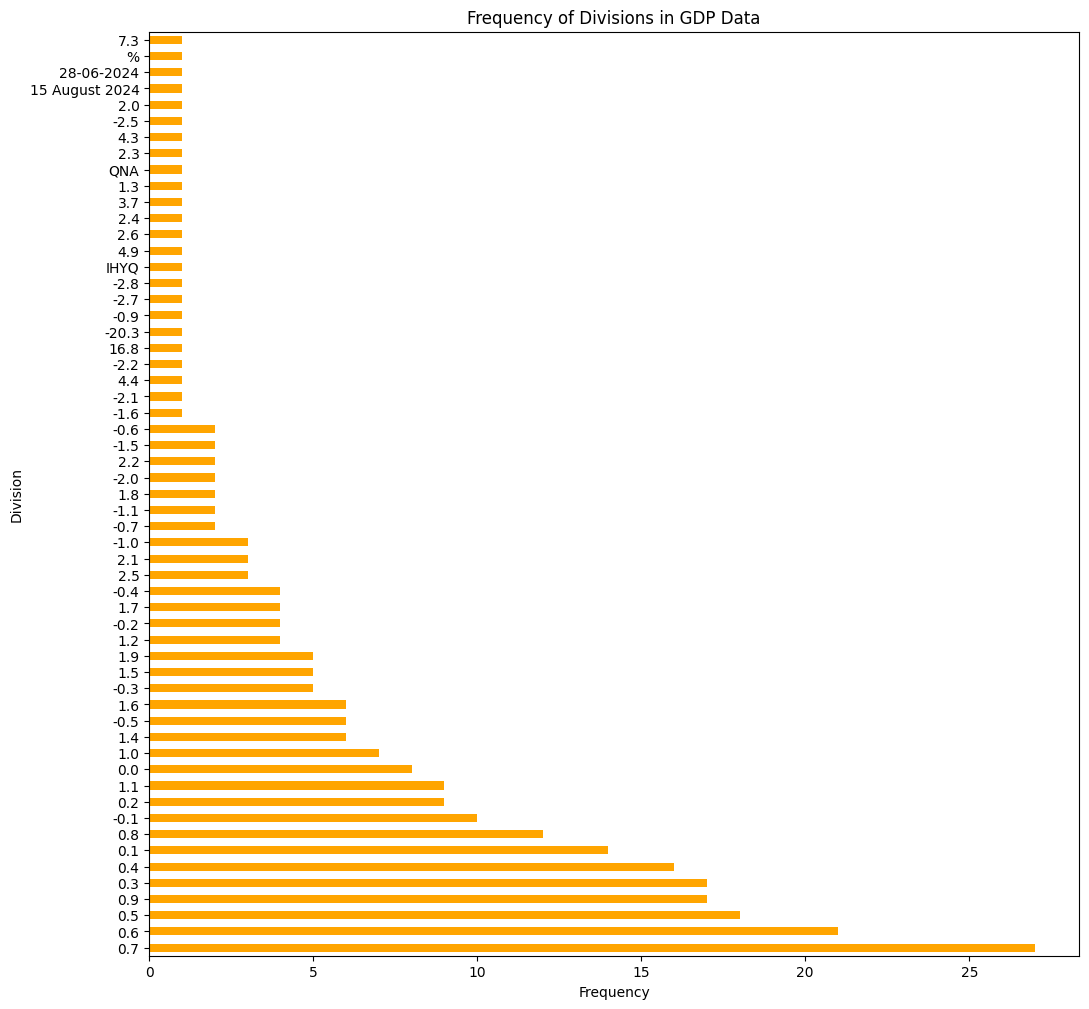

In [96]:
import matplotlib.pyplot as plt

# Horizontal bar plot of Division categories
plt.figure(figsize=(12, 12))  # Increase height to better fit the labels
gdp_df['Division'].value_counts().plot(kind='barh', color='orange')
plt.title('Frequency of Divisions in GDP Data')
plt.xlabel('Frequency')
plt.ylabel('Division')
plt.show()


/var/folders/8x/ynml0_qn0zs8n_hf0n09kxq80000gn/T/ipykernel_79498/563909383.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inflation_df['Date'] = pd.to_datetime(inflation_df['Date'], errors='coerce')  # Convert to datetime, coerce errors to NaT


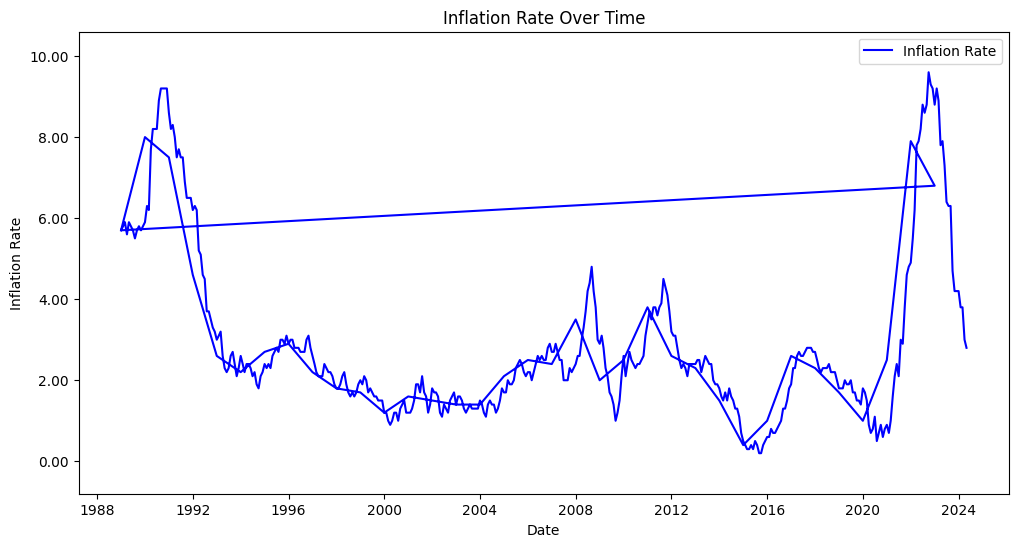

In [97]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Convert the 'Date' column to datetime and handle invalid dates
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'], errors='coerce')  # Convert to datetime, coerce errors to NaT
inflation_df = inflation_df.dropna(subset=['Date'])  # Remove invalid dates

# Convert the 'Inflation Rate' column to numeric, coerce errors to NaN
inflation_df['Inflation Rate'] = pd.to_numeric(inflation_df['Inflation Rate'], errors='coerce')

# Drop rows with NaN in 'Inflation Rate' to remove non-numeric values
inflation_df = inflation_df.dropna(subset=['Inflation Rate'])

# Plot the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(inflation_df['Date'], inflation_df['Inflation Rate'], label='Inflation Rate', color='blue')
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')

# Set y-axis limits dynamically
plt.ylim(inflation_df['Inflation Rate'].min() - 1, inflation_df['Inflation Rate'].max() + 1)

# Format y-axis labels for better readability
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Show integers only if appropriate
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))  # Format to 2 decimal places

plt.legend()
plt.show()


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the unemployment data
unemployment_df = pd.read_csv('Cleaned_Unemployment_Rate.csv')

# If the column names are not clean, rename the columns appropriately
unemployment_df.columns = unemployment_df.columns.str.strip()


In [99]:
# Display descriptive statistics
print(unemployment_df.describe())


       Unemployment Rate (%)
count             903.000000
mean                6.703987
std                 2.373123
min                 3.400000
25%                 4.900000
50%                 5.700000
75%                 8.300000
max                11.900000


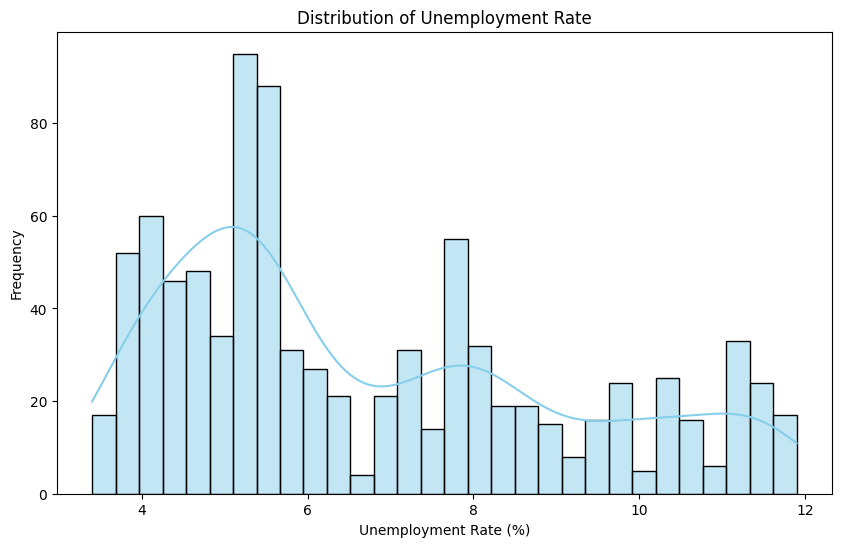

In [100]:
plt.figure(figsize=(10, 6))
sns.histplot(unemployment_df['Unemployment Rate (%)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


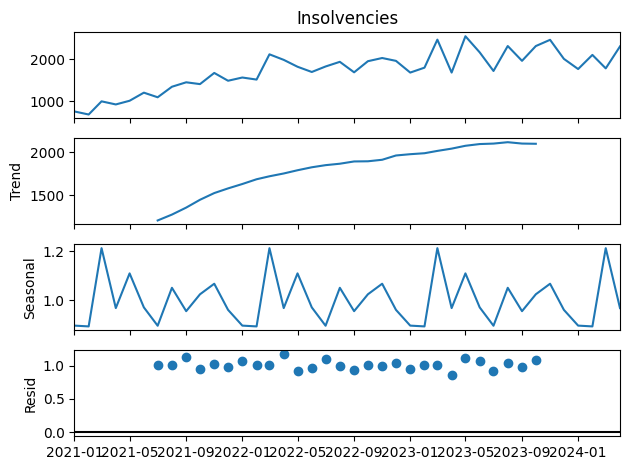

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for a selected industry (e.g., first industry)
industry = melted_data['Section'].unique()[0]
industry_series = melted_data[melted_data['Section'] == industry].set_index('Date')['Insolvencies']

# Decompose the time series
decomposition = seasonal_decompose(industry_series, model='multiplicative', period=12)
decomposition.plot()
plt.show()
